In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
rm ~/.kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp /content/gdrive/My\ Drive/kaggle.json /root/.kaggle

In [3]:
!kaggle datasets download -d pestipeti/bengaliai

bengaliai.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip /content/bengaliai.zip

unzip:  cannot find or open /root/.kaggle/bengaliai.zip, /root/.kaggle/bengaliai.zip.zip or /root/.kaggle/bengaliai.zip.ZIP.


In [0]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/kaggle/train.csv')

In [0]:
df['labels']= df['grapheme_root'].astype(str)+';'+df['vowel_diacritic'].astype(str)+';'+df['consonant_diacritic'].astype(str)
df = df.filter(['image_id','labels'])

In [0]:
databunch = ImageDataBunch.from_df(df=df,path='/content/images/256_train/256',bs=64,suffix='.png',valid_pct=0.1,label_col='labels',label_delim=';')

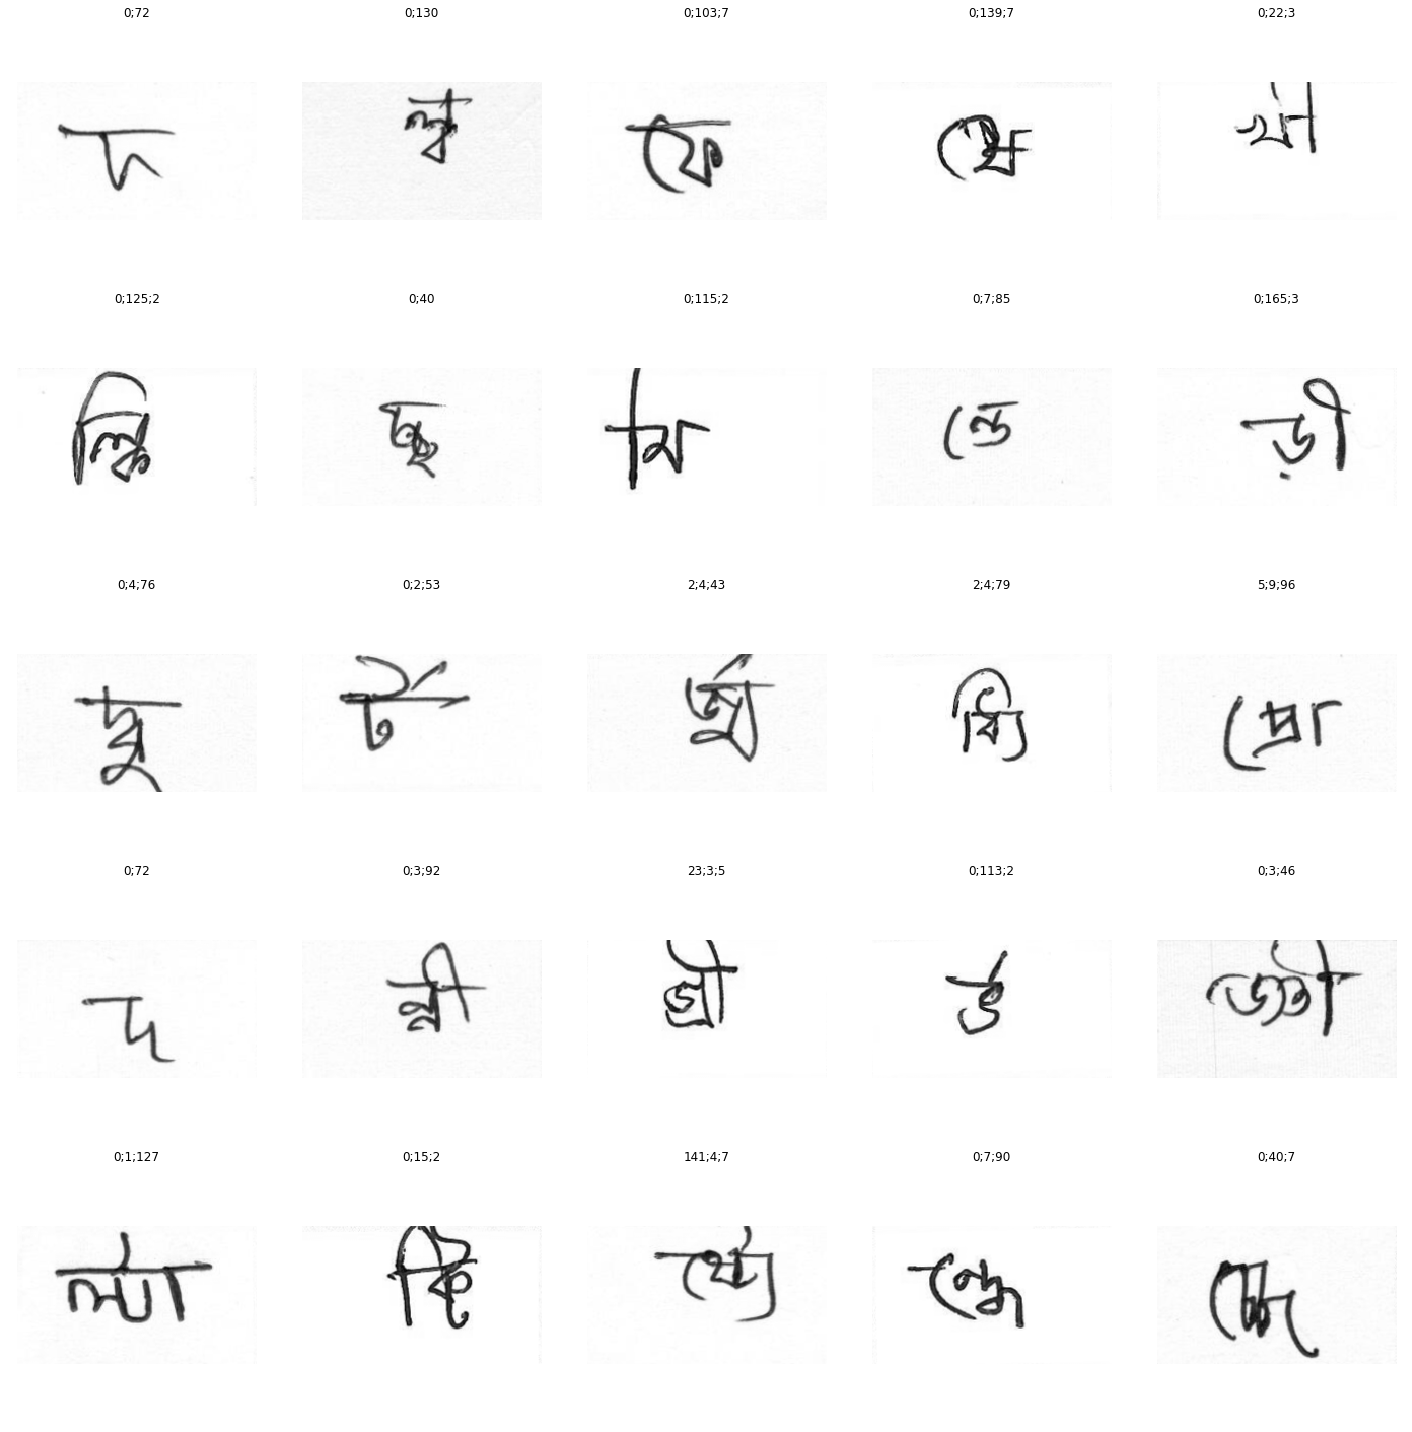

In [17]:
databunch.show_batch()

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learner = cnn_learner(databunch,models.resnet18,metrics=[acc_02,f_score])

In [0]:
learner.unfreeze()

In [27]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


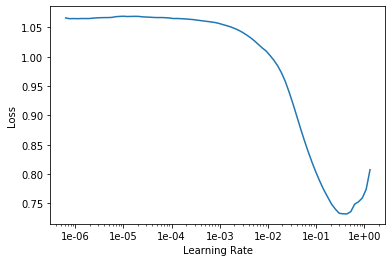

In [28]:
learner.recorder.plot()

In [29]:
learner.fit_one_cycle(4,slice(5e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.021602,0.019251,0.994534,0.834438,11:38
1,0.013688,0.009238,0.997519,0.934259,11:31
2,0.005846,0.004376,0.998674,0.967026,11:31
3,0.002572,0.002918,0.999093,0.978331,11:30


59 misclassified samples over 20084 samples in the validation set.


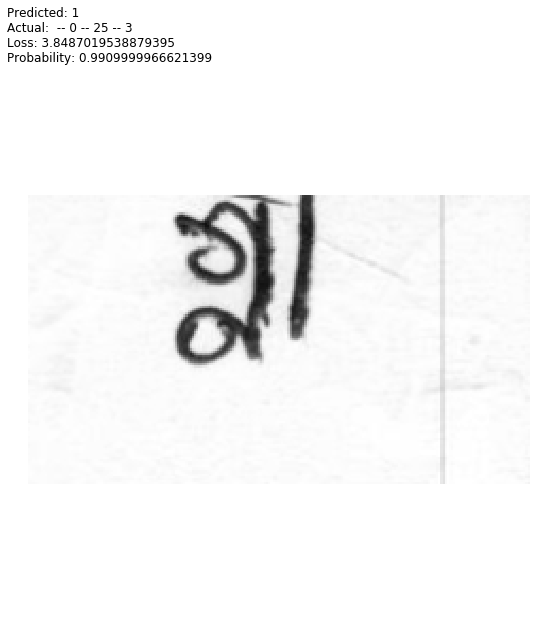

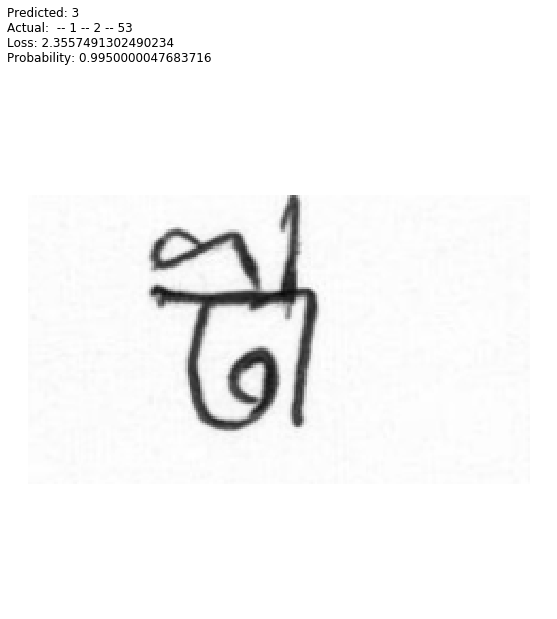

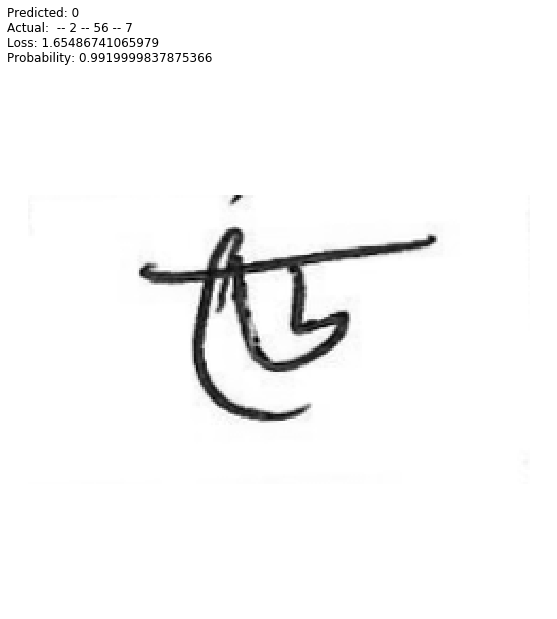

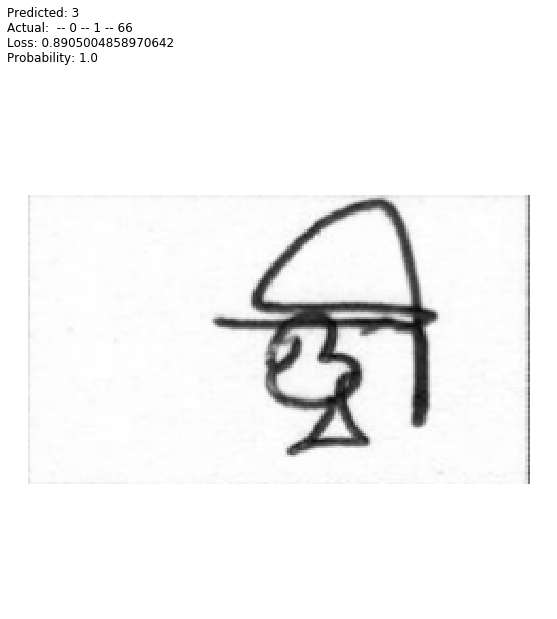

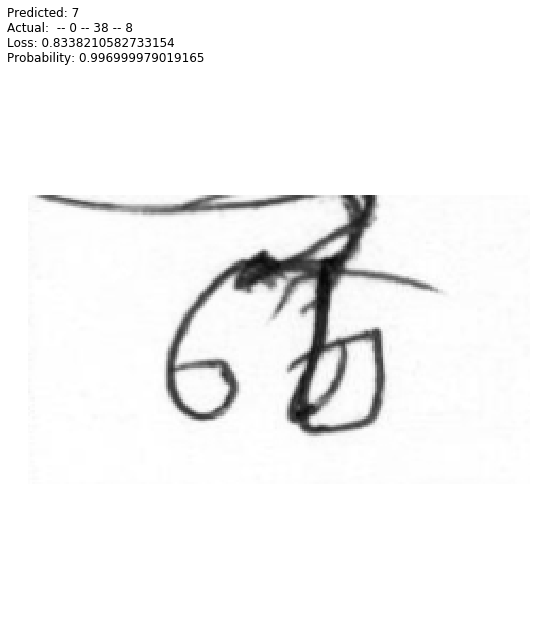

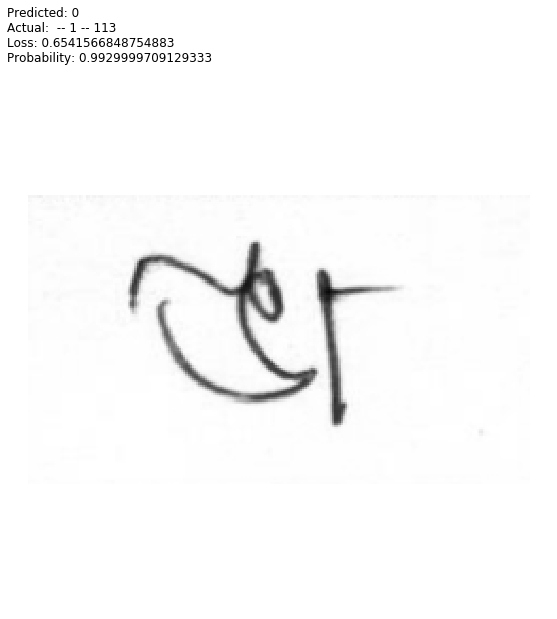

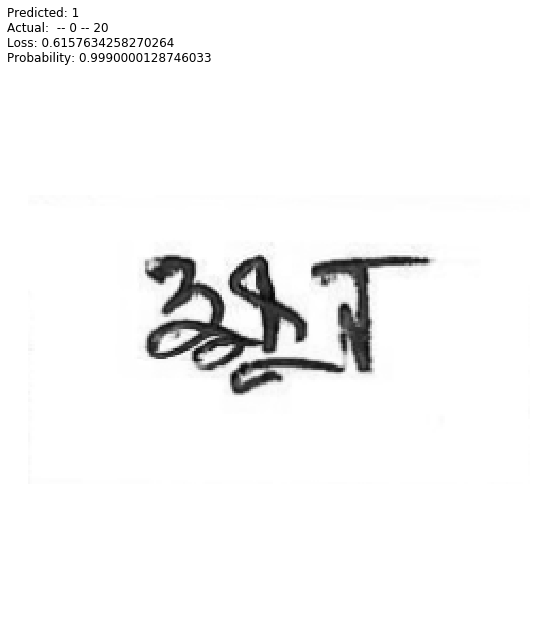

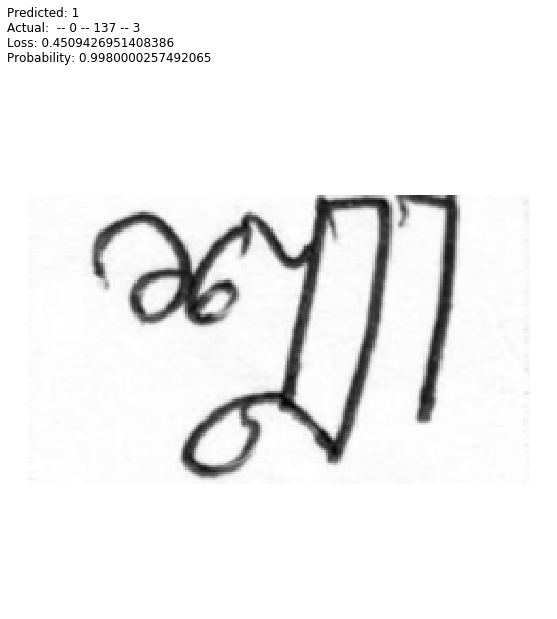

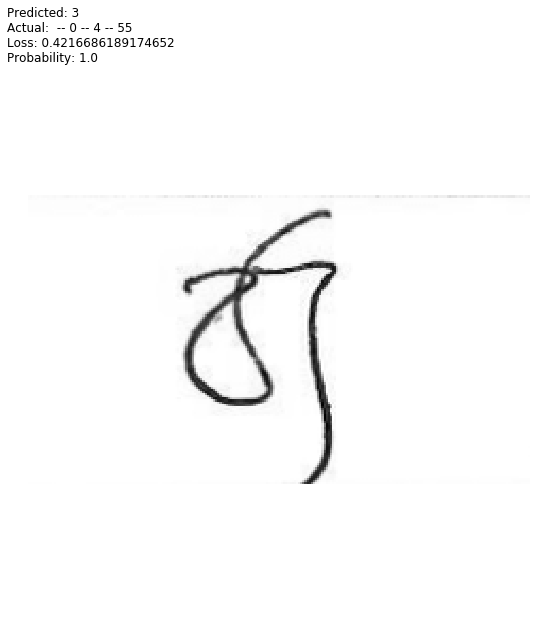

In [30]:
interp=ClassificationInterpretation.from_learner(learner)

59 misclassified samples over 20084 samples in the validation set.


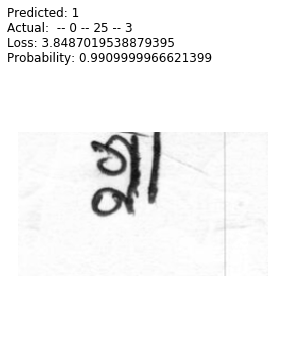

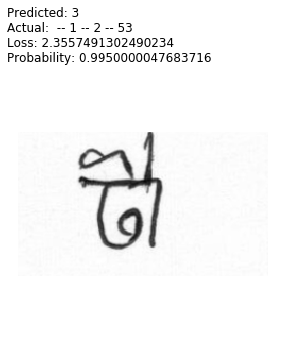

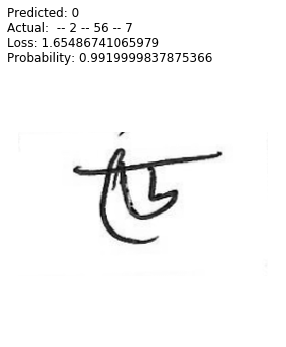

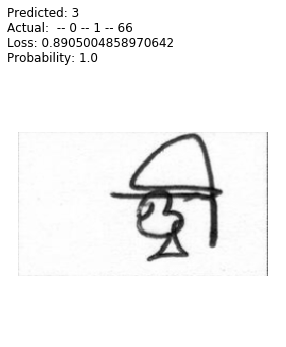

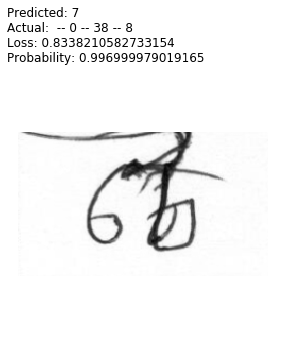

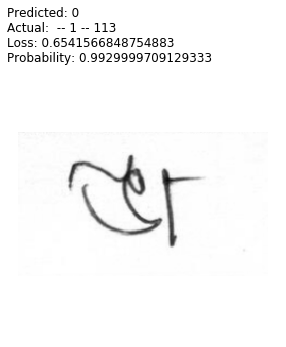

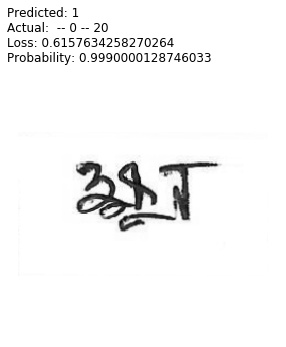

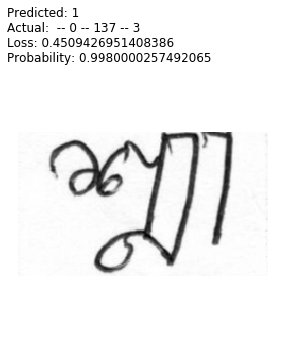

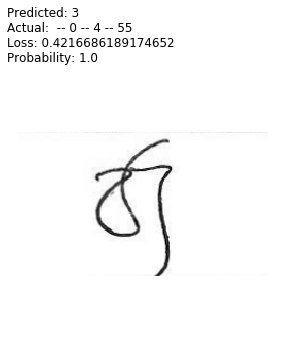

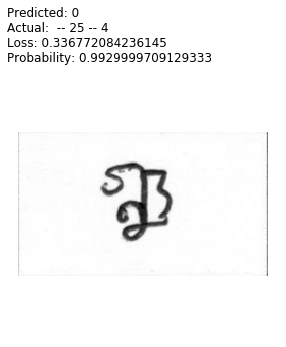

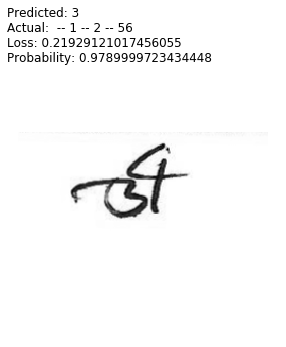

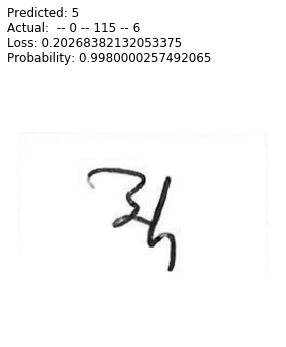

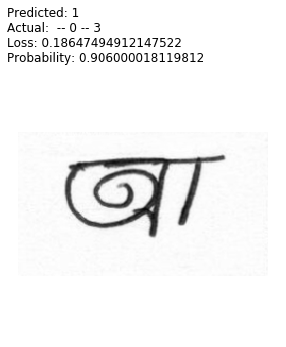

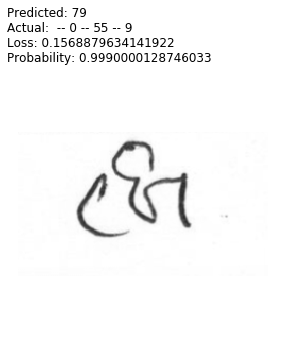

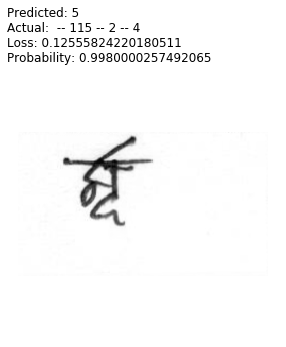

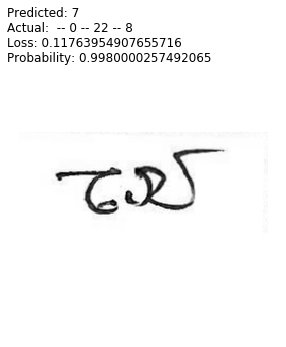

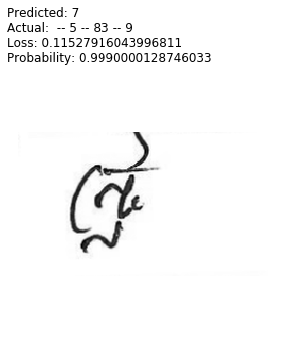

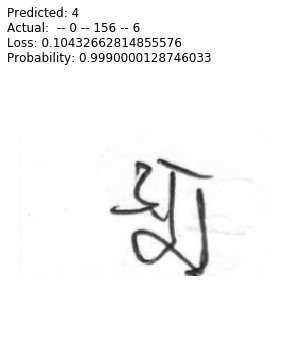

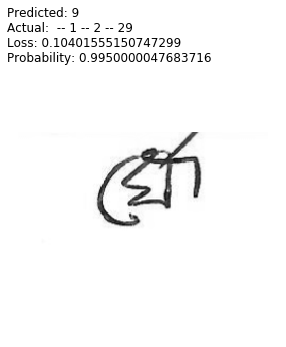

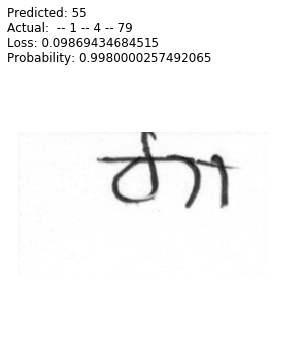

In [31]:
interp.plot_multi_top_losses(20,figsize=(5,5))